In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# **Dataset Visualization**

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [107]:
# Load your dataset
file_path = '/content/drive/MyDrive/Defense help/Rifat/used car data.csv'
car = pd.read_csv(file_path)

In [108]:
# Print first 5 rows and columns of the dataset
print("First 5 rows and columns of the dataset:")
car.head()


First 5 rows and columns of the dataset:


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,Toyota Harrier,2005,22.5,60,70000,Octane,Individual,Automatic,1
1,Honda Vezel,2014,19.2,45,57000,Hybrid,Individual,Automatic,1
2,Toyota Aqua,2014,12.0,25,45000,Octane,Individual,Automatic,1
3,Toyota Allion,2007,15.2,25,7879,Octane,Individual,Automatic,1
4,Toyota Aqua,2014,14.3,30,55000,Octane,Individual,Automatic,1


In [109]:
# Print number of attributes and rows for the dataset
num_attributes = len(car.columns)
num_rows = len(car)
print("\nNumber of attributes:", num_attributes)
print("Number of rows:", num_rows)



Number of attributes: 9
Number of rows: 811


In [110]:
# Print non-null value counts and data types for each attribute in the dataset
print("\nNon-null value counts and data types for each attribute:")
print(car.info())



Non-null value counts and data types for each attribute:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       811 non-null    object 
 1   Year           811 non-null    int64  
 2   Selling_Price  811 non-null    float64
 3   Present_Price  811 non-null    int64  
 4   Driven_kms     811 non-null    int64  
 5   Fuel_Type      811 non-null    object 
 6   Selling_type   811 non-null    object 
 7   Transmission   811 non-null    object 
 8   Owner          811 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 57.1+ KB
None


In [111]:
# Print the number of non-null values
print("\nNumber of non-null values Tottal In cell:")
print(car.count().sum())


Number of non-null values Tottal In cell:
7299



Number of data in the 'Year' attribute: 811


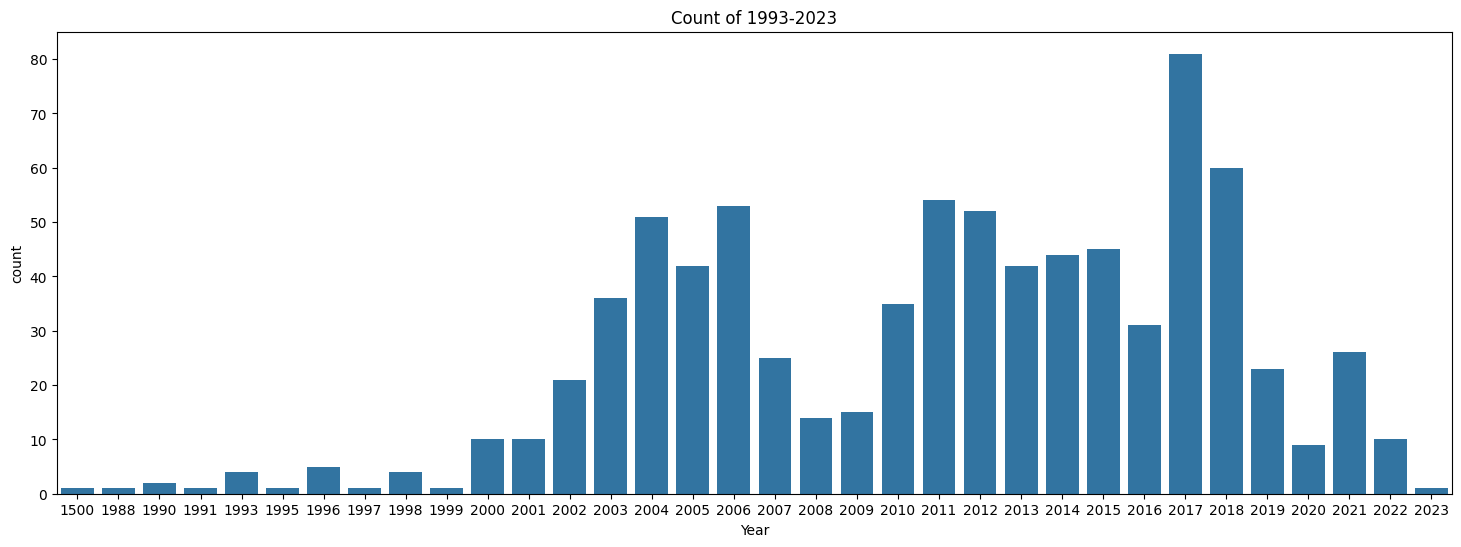

In [112]:
# Print the number of data in the 'Year' attribute
print("\nNumber of data in the 'Year' attribute:", len(car['Year']))

# Plot the count of each Year group
plt.figure(figsize=(18, 6))
sns.countplot(x='Year', data=car)
plt.title('Count of 1993-2023')
plt.show()


In [113]:
# Print the minimum and count of each Year group
Year_group_counts = car['Year'].value_counts().reset_index()
Year_group_counts.columns = ['Year ', 'Count']
print("\nCount of each Year group:")
print(Year_group_counts)


Count of each Year group:
    Year   Count
0    2017     81
1    2018     60
2    2011     54
3    2006     53
4    2012     52
5    2004     51
6    2015     45
7    2014     44
8    2005     42
9    2013     42
10   2003     36
11   2010     35
12   2016     31
13   2021     26
14   2007     25
15   2019     23
16   2002     21
17   2009     15
18   2008     14
19   2000     10
20   2001     10
21   2022     10
22   2020      9
23   1996      5
24   1993      4
25   1998      4
26   1990      2
27   2023      1
28   1500      1
29   1995      1
30   1997      1
31   1988      1
32   1999      1
33   1991      1


In [114]:
# Print the average, mean, median, and max for the 'What is Year' attribute
print("\nAverage year:", car['Year'].mean())
print("Mean year:", car['Year'].mode().iloc[0])  # using mode for mean since the data is categorical
print("Median year:", car['Year'].median())
print("Max year:", car['Year'].max())
print("Min year:", car['Year'].min())
print("Total year:", car['Year'].count())
# Calculate percentage distribution
year_percentage = car['Year'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Each year:")
print(year_percentage)



Average year: 2010.446362515413
Mean year: 2017
Median year: 2012.0
Max year: 2023
Min year: 1500
Total year: 811

Percentage Distribution of Each year:
2017    9.987670
2018    7.398274
2011    6.658446
2006    6.535142
2012    6.411837
2004    6.288533
2015    5.548705
2014    5.425401
2005    5.178792
2013    5.178792
2003    4.438964
2010    4.315660
2016    3.822441
2021    3.205919
2007    3.082614
2019    2.836005
2002    2.589396
2009    1.849568
2008    1.726264
2000    1.233046
2001    1.233046
2022    1.233046
2020    1.109741
1996    0.616523
1993    0.493218
1998    0.493218
1990    0.246609
2023    0.123305
1500    0.123305
1995    0.123305
1997    0.123305
1988    0.123305
1999    0.123305
1991    0.123305
Name: Year, dtype: float64



Number of data in the 'Selling_Price' attribute: 811


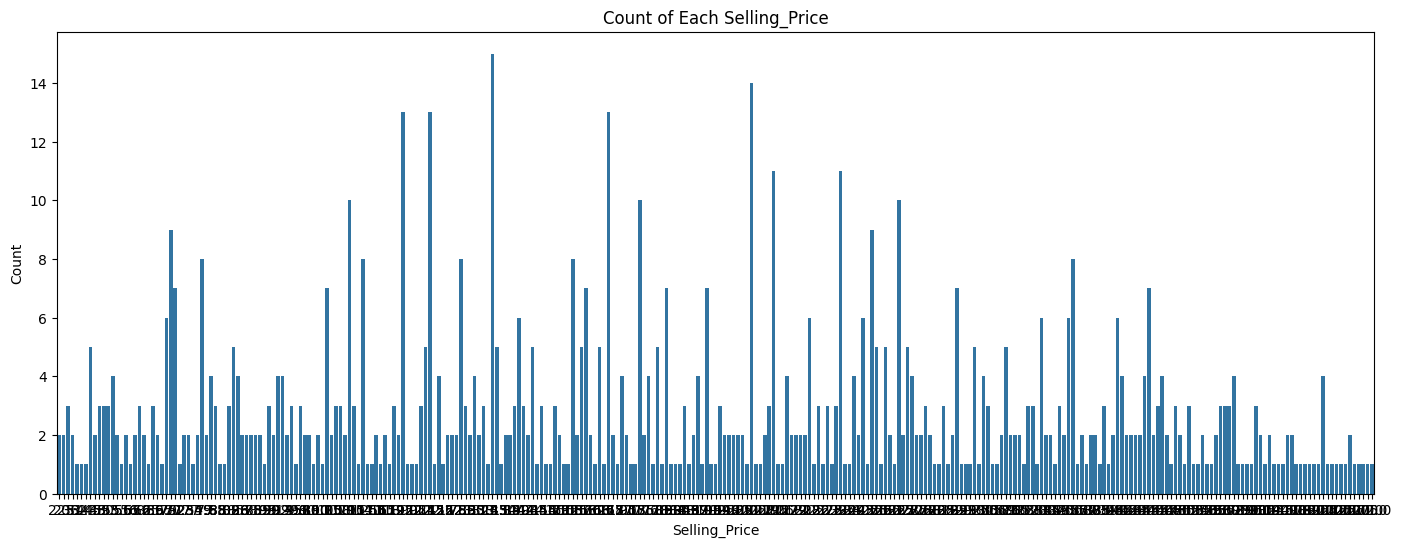

In [115]:
# Print the number of data in the 'Selling_Price' attribute
print("\nNumber of data in the 'Selling_Price' attribute:", len(car['Selling_Price']))

# Plot the count of each Student
plt.figure(figsize=(17, 6))
sns.countplot(x='Selling_Price', data=car)
plt.title('Count of Each Selling_Price')
plt.xlabel('Selling_Price')
plt.ylabel('Count')
plt.show()

In [116]:
# Print the counts of each Selling_Price
Selling_Price_counts = car['Selling_Price'].value_counts().reset_index()
Selling_Price_counts.columns = ['Selling_Price Catagory', 'Count']
print("\nCount of each Selling_Price Catagory:")
print(Selling_Price_counts)

# Calculate percentage distribution
Selling_Price_percentage = car['Selling_Price'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Selling_Price Catagory:")
print(Selling_Price_percentage)


Count of each Selling_Price Catagory:
     Selling_Price Catagory  Count
0                     13.50     15
1                     20.50     14
2                     12.50     13
3                     12.00     13
4                     16.80     13
..                      ...    ...
290                   20.70      1
291                   23.80      1
292                   12.10      1
293                   11.40      1
294                   18.35      1

[295 rows x 2 columns]

Percentage Distribution of Selling_Price Catagory:
13.50    1.849568
20.50    1.726264
12.50    1.602959
12.00    1.602959
16.80    1.602959
           ...   
20.70    0.123305
23.80    0.123305
12.10    0.123305
11.40    0.123305
18.35    0.123305
Name: Selling_Price, Length: 295, dtype: float64



Number of data in the 'Present_Price' attribute: 811


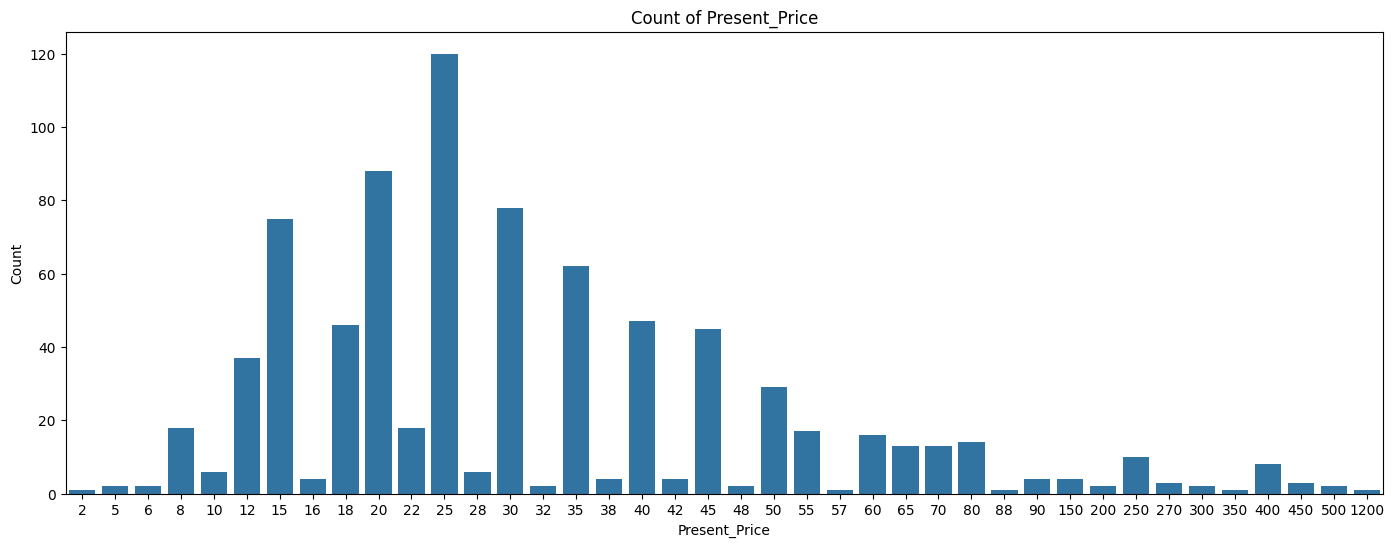

In [117]:
# Print the number of data in the 'Present_Price' attribute
print("\nNumber of data in the 'Present_Price' attribute:", len(car['Present_Price']))

# Plot the count Present_Price
plt.figure(figsize=(17, 6))
sns.countplot(x='Present_Price', data=car)
plt.title('Count of Present_Price')
plt.xlabel('Present_Price')
plt.ylabel('Count')
plt.show()

In [118]:
# Print the counts of each Present_Price
Present_Price_counts = car['Present_Price'].value_counts().reset_index()
Present_Price_counts.columns = ['Present_Price', 'Count']
print("\nCount of Present_Price:")
print(Present_Price_counts)
# Calculate percentage distribution
Present_Price_percentage = car['Present_Price'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Present_Price:")
print(Present_Price_percentage)


Count of Present_Price:
    Present_Price  Count
0              25    120
1              20     88
2              30     78
3              15     75
4              35     62
5              40     47
6              18     46
7              45     45
8              12     37
9              50     29
10              8     18
11             22     18
12             55     17
13             60     16
14             80     14
15             65     13
16             70     13
17            250     10
18            400      8
19             28      6
20             10      6
21             90      4
22             38      4
23            150      4
24             42      4
25             16      4
26            270      3
27            450      3
28              6      2
29             48      2
30             32      2
31            200      2
32            300      2
33            500      2
34              5      2
35           1200      1
36            350      1
37             57      1



Number of data in the 'Driven_kms' attribute: 811


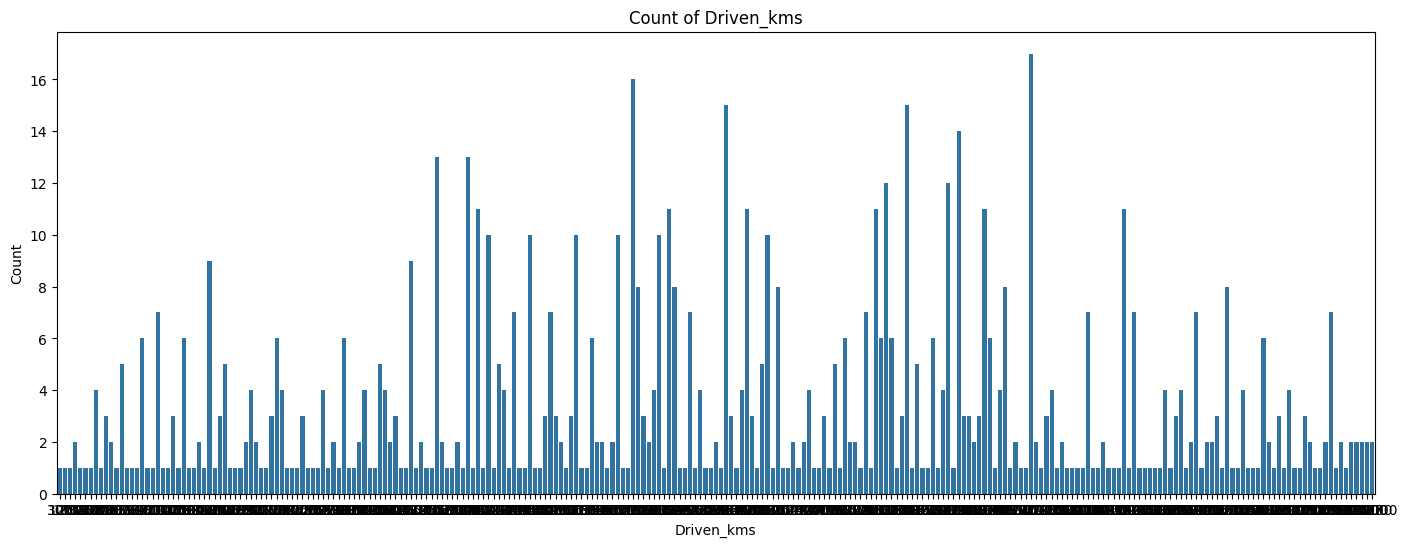

In [119]:
# Print the number of data in the 'Driven_kms' attribute
print("\nNumber of data in the 'Driven_kms' attribute:", len(car['Driven_kms']))

# Plot the count Driven_kms
plt.figure(figsize=(17, 6))
sns.countplot(x='Driven_kms', data=car)
plt.title('Count of Driven_kms')
plt.xlabel('Driven_kms')
plt.ylabel('Count')
plt.show()

In [120]:
# Print the counts of Driven_kms
five_counts = car['Driven_kms'].value_counts().reset_index()
five_counts.columns = ['Driven_kms', 'Count']
print("\nCount of each Entry in Driven_kms:")
print(five_counts)


Count of each Entry in Driven_kms:
     Driven_kms  Count
0        100000     17
1         56000     16
2         65000     15
3         85000     15
4         90000     14
..          ...    ...
250       72000      1
251       68000      1
252      105600      1
253      126000      1
254      197780      1

[255 rows x 2 columns]



Number of data in the 'Fuel_Type' attribute: 811


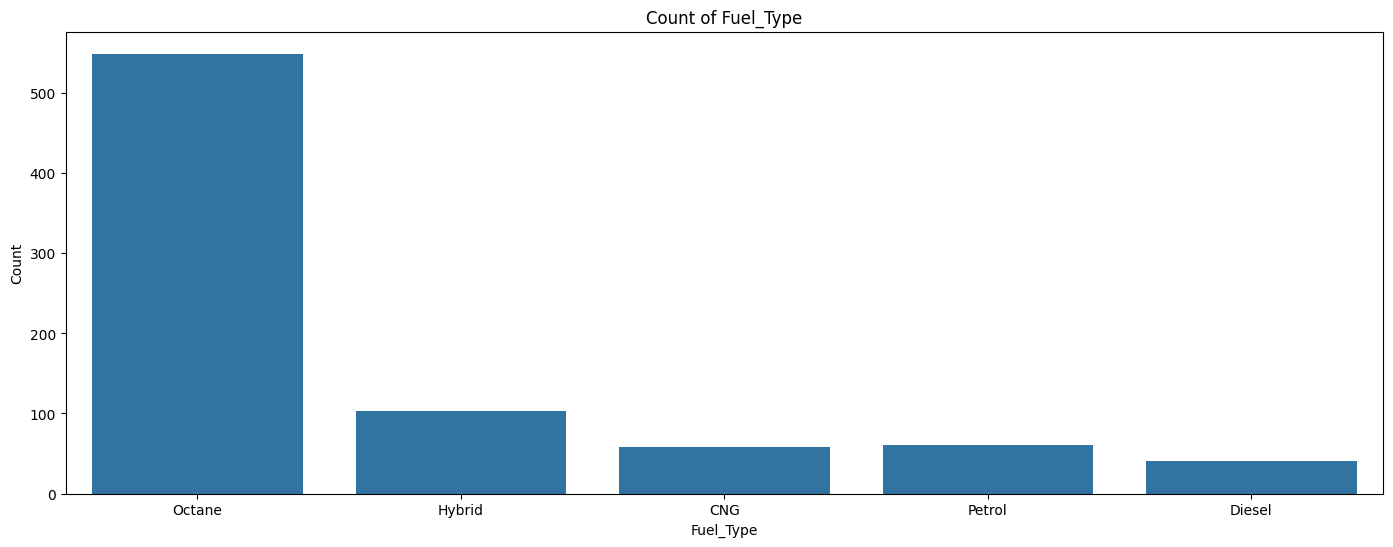

In [121]:
# Print the number of data in the 'Fuel_Type' attribute
print("\nNumber of data in the 'Fuel_Type' attribute:", len(car['Fuel_Type']))

# Plot the count Fuel_Type
plt.figure(figsize=(17, 6))
sns.countplot(x='Fuel_Type', data=car)
plt.title('Count of Fuel_Type')
plt.xlabel('Fuel_Type')
plt.ylabel('Count')
plt.show()

In [122]:
# Print the counts of Fuel_Type
six_counts = car['Fuel_Type'].value_counts().reset_index()
six_counts.columns = ['Fuel_Type', 'Count']
print("\nCount of each Entry in Fuel_Type:")
print(six_counts)


Count of each Entry in Fuel_Type:
  Fuel_Type  Count
0    Octane    549
1    Hybrid    103
2    Petrol     60
3       CNG     58
4    Diesel     41



Number of data in the 'Selling_type' attribute: 811


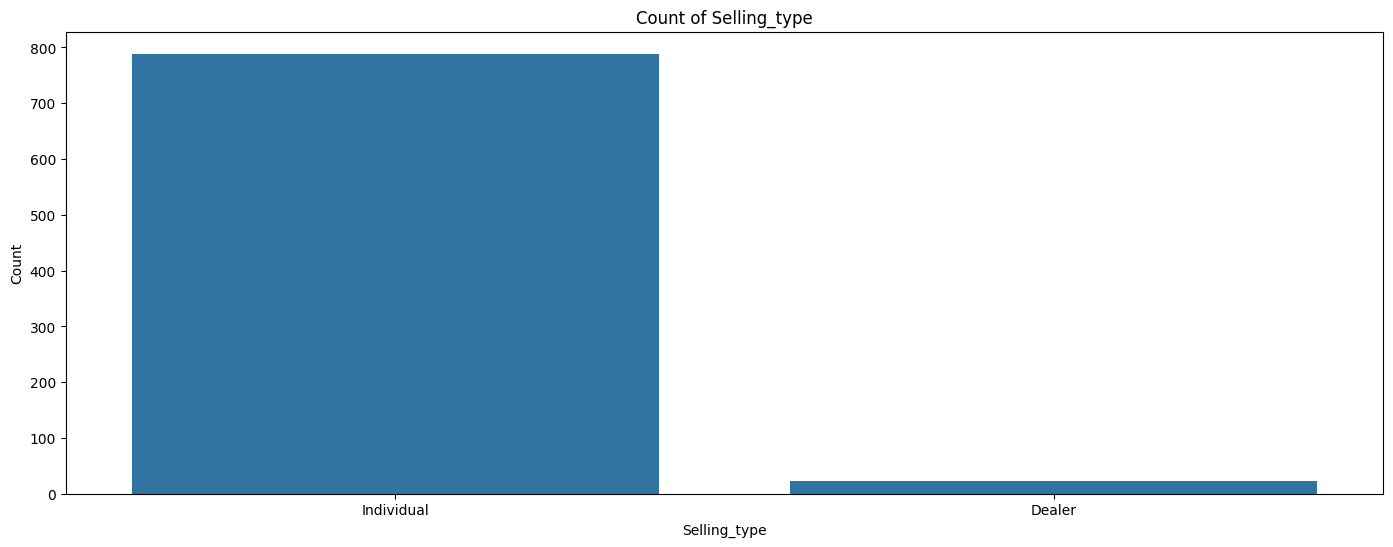

In [123]:
# Print the number of data in the 'Selling_type' attribute
print("\nNumber of data in the 'Selling_type' attribute:", len(car['Selling_type']))

# Plot the count Selling_type
plt.figure(figsize=(17, 6))
sns.countplot(x='Selling_type', data=car)
plt.title('Count of Selling_type')
plt.xlabel('Selling_type')
plt.ylabel('Count')
plt.show()

In [124]:
# Print the counts of Selling_type
seven_counts = car['Selling_type'].value_counts().reset_index()
seven_counts.columns = ['Selling_type', 'Count']
print("\nCount of each Entry in Column Selling_type:")
print(seven_counts)


Count of each Entry in Column Selling_type:
  Selling_type  Count
0   Individual    789
1       Dealer     22



Number of data in the 'Transmission' attribute: 811


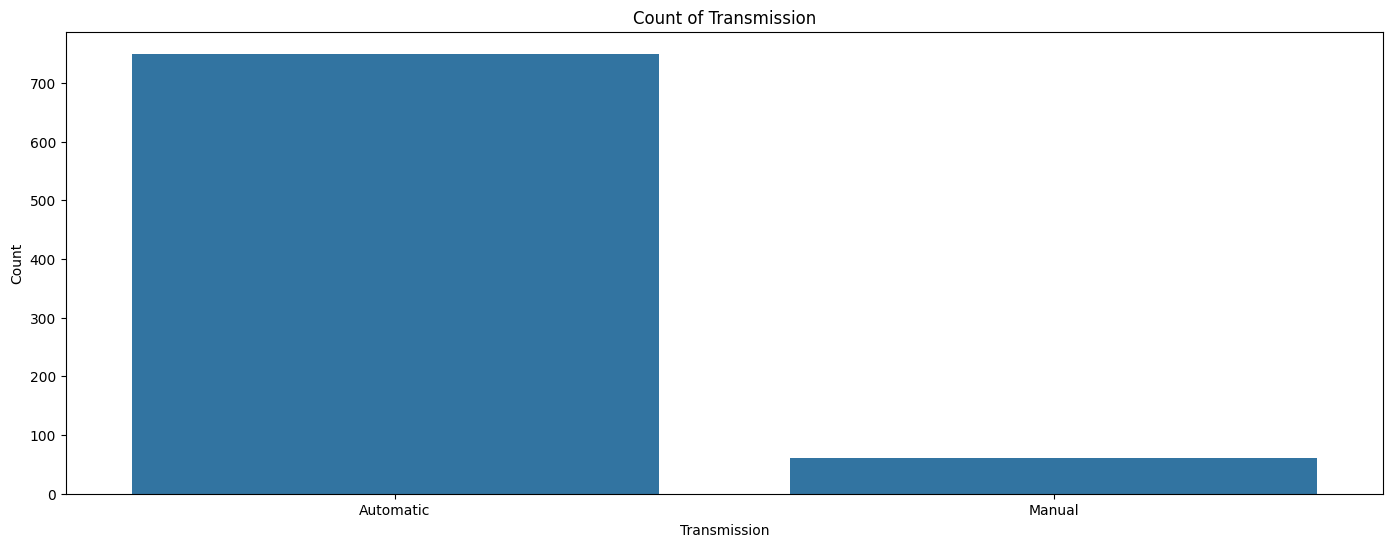

In [125]:
# Print the number of data in the 'Transmission' attribute
print("\nNumber of data in the 'Transmission' attribute:", len(car['Transmission']))

# Plot the count Transmission
plt.figure(figsize=(17, 6))
sns.countplot(x='Transmission', data=car)
plt.title('Count of Transmission')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()

In [126]:
# Print the counts of Transmission
eight_counts = car['Transmission'].value_counts().reset_index()
eight_counts.columns = ['Transmission', 'Count']
print("\nCount of each Entry in Column Transmission:")
print(eight_counts)


Count of each Entry in Column Transmission:
  Transmission  Count
0    Automatic    750
1       Manual     61



Number of data in the 'Owner' attribute: 811


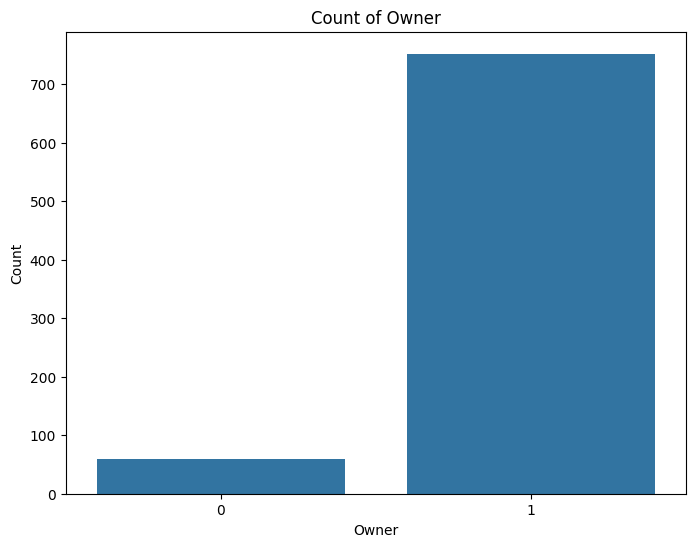

In [127]:
# Print the number of data in the 'Owner' attribute
print("\nNumber of data in the 'Owner' attribute:", len(car['Owner']))

# Plot the count Owner
plt.figure(figsize=(8, 6))
sns.countplot(x='Owner', data=car)
plt.title('Count of Owner')
plt.xlabel('Owner')
plt.ylabel('Count')
plt.show()

In [128]:
# Print the counts of Owner
eleven_counts = car['Owner'].value_counts().reset_index()
eleven_counts.columns = ['Owner', 'Count']
print("\nCount of each Entry in Column Owner:")
print(eleven_counts)


Count of each Entry in Column Owner:
   Owner  Count
0      1    752
1      0     59


In [130]:
# Print the counts of Car_Name
Car_Name = 'Car_Name'
print("\nInformation about the attribute:", Car_Name)
print(car[Car_Name].describe())
Car_Name = car[Car_Name].value_counts()

print("\nCount of each value in the Car NAme:")
for value, count in Car_Name.items():
    print(f"{value}: {count}")


Information about the attribute: Car_Name
count                811
unique               411
top       Nissan X Trail
freq                  20
Name: Car_Name, dtype: object

Count of each value in the Car NAme:
Nissan X Trail: 20
Toyota Axio: 13
Mazda Axela: 12
Toyota Axio X: 12
Toyota Corolla X: 12
Toyota X Corolla: 11
Toyota Premio F: 11
Nissan Carryboy: 9
Toyota Aqua: 9
Toyota Corolla: 9
Toyota Allion: 8
Toyota Allion A: 8
Mitsubishi Outlander: 7
Nissan X Trail Hybrid: 7
Toyota Allion G: 7
Toyota Harrier: 7
Nissan Sunny: 7
Honda Accord: 6
Toyota Raum: 6
Toyota X Fielder: 6
Toyota Hiace Super GL: 6
Honda Vezel Hybrid: 6
Toyota Probox: 6
Toyota Axio X Hybrid: 5
Toyota Corolla G: 5
Toyota Passo: 5
Toyota Succeed: 5
Toyota Corolla Cross: 4
Mercedes-Benz B-Class: 4
Honda Civic FC Car: 4
Honda Vezel: 4
Toyota Spacio X: 4
Range Rover Sport P4: 4
Toyota Rush: 4
Honda CR V: 4
Mitsubishi Lancer GLX: 4
Toyota Ractis G Edition: 3
Toyota Fielder: 3
Toyota Axio X Grade Silver Car: 3
Toyota Prius 

# **Dataset Pre-Processing**

In [131]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,Toyota Harrier,2005,22.5,60,70000,Octane,Individual,Automatic,1
1,Honda Vezel,2014,19.2,45,57000,Hybrid,Individual,Automatic,1
2,Toyota Aqua,2014,12.0,25,45000,Octane,Individual,Automatic,1
3,Toyota Allion,2007,15.2,25,7879,Octane,Individual,Automatic,1
4,Toyota Aqua,2014,14.3,30,55000,Octane,Individual,Automatic,1


In [132]:
# Binning the Selling Prices
bins = [0, 10, 20, float('inf')]
labels = ['Low Price', 'Medium Price', 'High Price']
car['Price_Category'] = pd.cut(car['Selling_Price'], bins=bins, labels=labels)


In [133]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the target column
car['Price_Category'] = label_encoder.fit_transform(car['Price_Category'])
# Apply label encoding to the selected columns
categorical_columns = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

for column in categorical_columns:
    car[column] = label_encoder.fit_transform(car[column])

# Display the updated dataset
print(car.head())



   Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0       325  2005           22.5             60       70000          3   
1        23  2014           19.2             45       57000          2   
2       243  2014           12.0             25       45000          3   
3       233  2007           15.2             25        7879          3   
4       243  2014           14.3             30       55000          3   

   Selling_type  Transmission  Owner  Price_Category  
0             1             0      1               0  
1             1             0      1               2  
2             1             0      1               2  
3             1             0      1               2  
4             1             0      1               2  


In label encoding, each unique value in a categorical column is assigned an integer label. The assignment is done based on the order of appearance of unique values. Here's a breakdown of how the label encoding was applied to each column:

1.Car_Name: Each unique car name in the 'Car_Name' column is assigned a unique integer label.
For example, the serial of 'Nissan X Trail' is assigned the label 217 cause its serial 217 in dataset, 'Honda Vezel' is assigned the label 23 cause its serial 23 in dataset, and so on.

2.Fuel_Type: Each unique fuel type in the 'Fuel_Type' column is assigned a unique integer label.
'Octane' is assigned the label 3, 'Hybrid' is assigned the label 2, 'CNG' is assigned the label 1, 'Petrol' is assigned the label 4, and 'Diesel' is assigned the label 0.

3.Selling_type: Each unique selling type in the 'Selling_type' column is assigned a unique integer label.
'Individual' is assigned the label 1, and 'Dealer' is assigned the label 0.

4.Transmission: Each unique transmission type in the 'Transmission' column is assigned a unique integer label.
'Automatic' is assigned the label 0, and 'Manual' is assigned the label 1.

5. also in  I create bins for "Low Price," "Medium Price," and "High Price" based on the distribution of the selling prices in dataset. Let's assume the following bins:

Low Price: 0 to 10
Medium Price: 10 to 20
High Price: 20 and above

In [134]:
# Display the updated DataFrame
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Price_Category
0,325,2005,22.5,60,70000,3,1,0,1,0
1,23,2014,19.2,45,57000,2,1,0,1,2
2,243,2014,12.0,25,45000,3,1,0,1,2
3,233,2007,15.2,25,7879,3,1,0,1,2
4,243,2014,14.3,30,55000,3,1,0,1,2


In [135]:
# Print non-null value counts and data types for each attribute in the dataset
print("\nNon-null value counts and data types for each attribute:")
print(car.info())



Non-null value counts and data types for each attribute:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Car_Name        811 non-null    int64  
 1   Year            811 non-null    int64  
 2   Selling_Price   811 non-null    float64
 3   Present_Price   811 non-null    int64  
 4   Driven_kms      811 non-null    int64  
 5   Fuel_Type       811 non-null    int64  
 6   Selling_type    811 non-null    int64  
 7   Transmission    811 non-null    int64  
 8   Owner           811 non-null    int64  
 9   Price_Category  811 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 63.5 KB
None


# **Train And Test**

In [136]:
# Separate features (X) and target variable (y)
X = car.drop(['Selling_Price', 'Price_Category'], axis=1)  # Features
y = car['Price_Category']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# **Algorithms**

# **Logistic Regression**

# ***Random Forest***

In [137]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Print the results for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:")
print(rf_report)
print("Confusion Matrix:")
print(rf_cm)

Random Forest Results:
Accuracy: 0.9016393442622951
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       102
           1       0.91      0.89      0.90        47
           2       0.85      0.91      0.88        95

    accuracy                           0.90       244
   macro avg       0.90      0.90      0.90       244
weighted avg       0.90      0.90      0.90       244

Confusion Matrix:
[[92  0 10]
 [ 0 42  5]
 [ 5  4 86]]


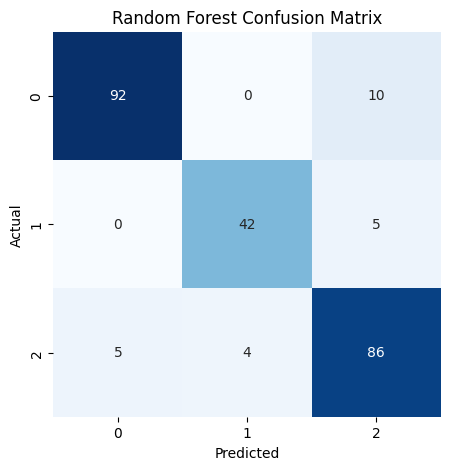

In [138]:
# Plot Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ***Gradient Boosting***

In [139]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)

# Print the results for Gradient Boosting
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_report = classification_report(y_test, gb_predictions)
gb_cm = confusion_matrix(y_test, gb_predictions)

print("Gradient Boosting Results:")
print(f"Accuracy: {gb_accuracy}")
print("Classification Report:")
print(gb_report)
print("Confusion Matrix:")
print(gb_cm)


Gradient Boosting Results:
Accuracy: 0.8770491803278688
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       102
           1       0.86      0.81      0.84        47
           2       0.82      0.89      0.85        95

    accuracy                           0.88       244
   macro avg       0.88      0.87      0.87       244
weighted avg       0.88      0.88      0.88       244

Confusion Matrix:
[[91  1 10]
 [ 0 38  9]
 [ 5  5 85]]


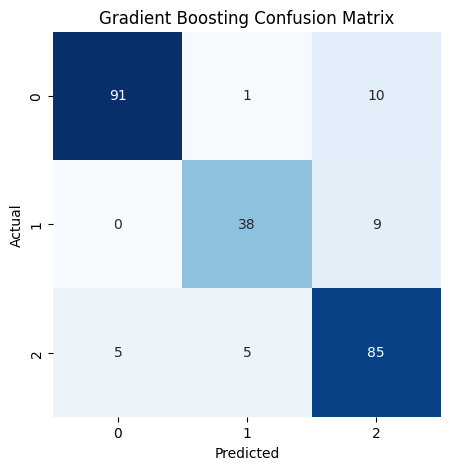

In [140]:
# Plot Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ***AdaBoost***

In [141]:
# AdaBoost
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)
adaboost_predictions = adaboost.predict(X_test)

# Print the results for AdaBoost
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
adaboost_report = classification_report(y_test, adaboost_predictions)
adaboost_cm = confusion_matrix(y_test, adaboost_predictions)

print("AdaBoost Results:")
print(f"Accuracy: {adaboost_accuracy}")
print("Classification Report:")
print(adaboost_report)
print("Confusion Matrix:")
print(adaboost_cm)

AdaBoost Results:
Accuracy: 0.7581967213114754
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       102
           1       0.71      0.83      0.76        47
           2       0.72      0.62      0.67        95

    accuracy                           0.76       244
   macro avg       0.75      0.77      0.75       244
weighted avg       0.76      0.76      0.75       244

Confusion Matrix:
[[87  0 15]
 [ 0 39  8]
 [20 16 59]]


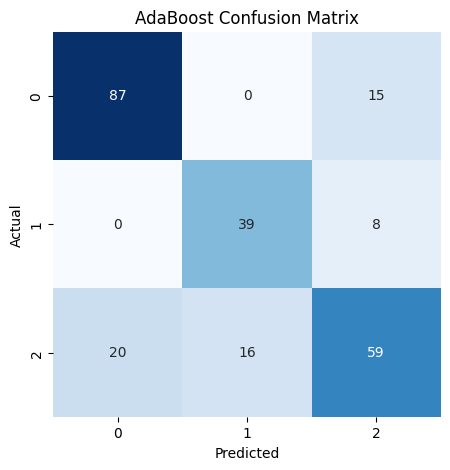

In [142]:
# Plot Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(adaboost_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Decision Tree**


Decision Tree Classifier:
Accuracy: 0.8237704918032787

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.89       102
           1       0.70      0.74      0.72        47
           2       0.78      0.84      0.81        95

    accuracy                           0.82       244
   macro avg       0.81      0.81      0.81       244
weighted avg       0.83      0.82      0.83       244



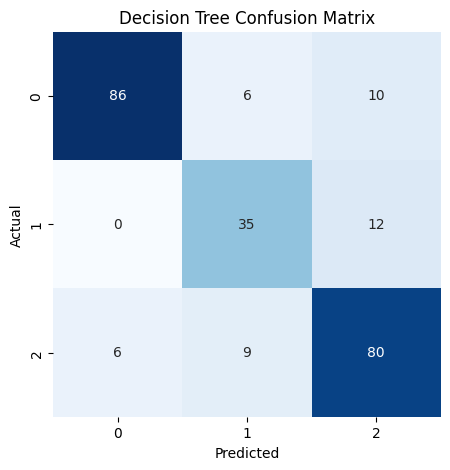

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)

# Calculate the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Evaluate the model
print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


# Plot Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Support Vector Classifier**

In [144]:
from sklearn.svm import SVC
# Support Vector Classifier
svc_clf = SVC(kernel='linear', random_state=42)
svc_clf.fit(X_train, y_train)
svc_pred = svc_clf.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_report = classification_report(y_test, svc_pred)
svc_cm = confusion_matrix(y_test, svc_pred)

print("Support Vector Classifier Results:")
print(f"Accuracy: {svc_accuracy}")
print("Classification Report:")
print(svc_report)




Support Vector Classifier Results:
Accuracy: 0.7172131147540983
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       102
           1       1.00      0.15      0.26        47
           2       0.59      0.89      0.71        95

    accuracy                           0.72       244
   macro avg       0.83      0.62      0.61       244
weighted avg       0.80      0.72      0.68       244



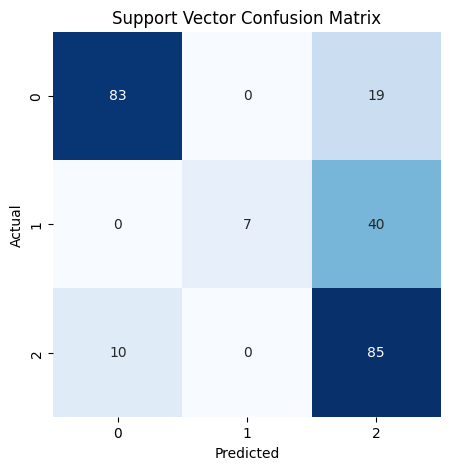

In [145]:
# Plot Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Support Vector Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **All Algorithm Comparision**

In [146]:
# Initialize the classifiers
classifiers = [

    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    SVC(kernel='linear', random_state=42)

]

# Store classifier names and accuracies
classifier_names = []
accuracies = []

In [147]:
# Loop through each classifier
for clf in classifiers:
    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Predict on the test data
    predictions = clf.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, predictions)

    # Append to lists
    classifier_names.append(type(clf).__name__)
    accuracies.append(acc)

    # Print results for each classifier
    print(f"{type(clf).__name__} Accuracy: {acc}")
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("\n" + "="*50 + "\n")

RandomForestClassifier Accuracy: 0.9016393442622951
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       102
           1       0.91      0.89      0.90        47
           2       0.85      0.91      0.88        95

    accuracy                           0.90       244
   macro avg       0.90      0.90      0.90       244
weighted avg       0.90      0.90      0.90       244

Confusion Matrix:
[[92  0 10]
 [ 0 42  5]
 [ 5  4 86]]


GradientBoostingClassifier Accuracy: 0.8770491803278688
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       102
           1       0.86      0.81      0.84        47
           2       0.82      0.89      0.85        95

    accuracy                           0.88       244
   macro avg       0.88      0.87      0.87       244
weighted avg       0.88      0.88      0.88       244

Confusion Matrix:
[[91  1 1

In [148]:
import plotly.express as px

# Create a DataFrame for accuracies
df_accuracies = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': accuracies})

# Plot the accuracies using Plotly
fig = px.bar(df_accuracies, x='Classifier', y='Accuracy', color='Accuracy',
             labels={'Accuracy': 'Accuracy Score'},
             title='Classifier Accuracy Comparison')

# Add text annotations to the top of each bar
for i, acc in enumerate(accuracies):
    fig.add_annotation(x=classifier_names[i], y=acc, text=f'{acc:.2f}', showarrow=False, yshift=10)

# Show the figure
fig.show()


# **User Input**

In [149]:
# Display the updated DataFrame
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Price_Category
0,325,2005,22.5,60,70000,3,1,0,1,0
1,23,2014,19.2,45,57000,2,1,0,1,2
2,243,2014,12.0,25,45000,3,1,0,1,2
3,233,2007,15.2,25,7879,3,1,0,1,2
4,243,2014,14.3,30,55000,3,1,0,1,2


In [150]:
# User input section for predicting car selling price
user_data = {
    'Car_Name': [23],                   # Example Car_Name (replace with an appropriate numeric value)
    'Year': [2008],                     # Example Year (replace with an appropriate numeric value)
    'Present_Price': [30.0],            # Example Present_Price (replace with an appropriate numeric value)
    'Driven_kms': [50000],              # Example Driven_kms (replace with an appropriate numeric value)
    'Fuel_Type': [2],                    # Example Fuel_Type (replace with an appropriate numeric value)
    'Selling_type': [0],                 # Example Selling_type (replace with an appropriate numeric value)
    'Transmission': [1],                # Example Transmission (replace with an appropriate numeric value)
    'Owner': [1]   # Example owner (encoded value)
}



In [151]:
# Fit label encoder on the entire target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert the user input to a DataFrame
user_data_df = pd.DataFrame(user_data)

# Fit each model on the entire dataset
for model in classifiers:
    model.fit(X, y_encoded)

# Predict car selling price using each model
for i, model in enumerate(classifiers):
    predicted_category = model.predict(user_data_df)[0]
    predicted_price_category = label_encoder.inverse_transform([predicted_category])[0]

    print(f"\nPrediction using {classifier_names[i]}:")
    print(f"Predicted Price Category: {predicted_price_category}")

# End of the program


Prediction using RandomForestClassifier:
Predicted Price Category: 2

Prediction using GradientBoostingClassifier:
Predicted Price Category: 2

Prediction using AdaBoostClassifier:
Predicted Price Category: 2

Prediction using DecisionTreeClassifier:
Predicted Price Category: 2

Prediction using SVC:
Predicted Price Category: 0
